<a href="https://colab.research.google.com/github/krish1929/DECISION_TREE_14/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import balanced_accuracy_score

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.shape

(1025, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.notnull().sum()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

<Axes: >

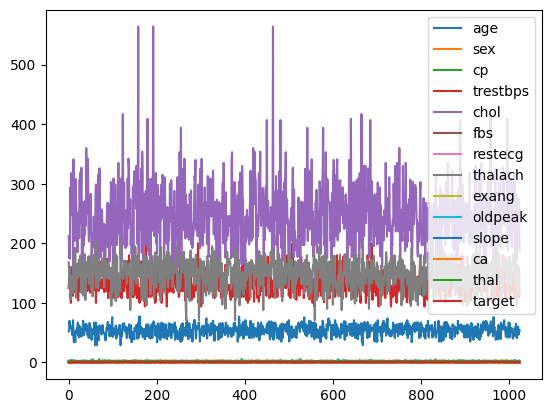

In [13]:
df.plot()

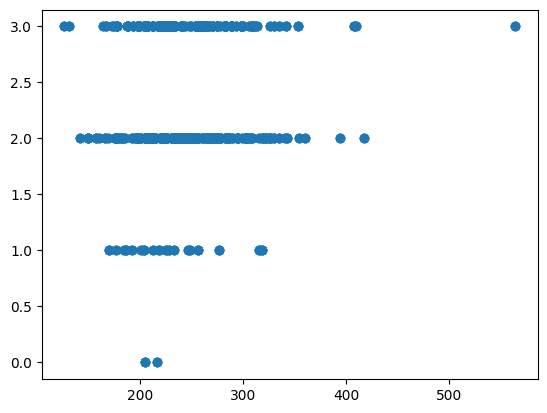

In [17]:
x =df.chol
y = df.thal
plt.scatter(x,y)

([<matplotlib.patches.Wedge at 0x7f7fc98afaf0>,
  ...],
 [Text(1.0999913896495177, 0.00435232086629402, ''),
  Text(1.0999225076544359, 0.013056690054435507, ''),
  Text(1.0997847479776963, 0.021760241626304196, ''),
  Text(1.099578119245877, 0.030462430561273377, ''),
  Text(1.0993533295331308, 0.03771282069031314, ''),
  Text(1.0991390761454338, 0.04351196720630059, ''),
  Text(1.0989583106724397, 0.047860541200216496, ''),
  Text(1.0986905281840555, 0.053657462469273595, ''),
  Text(1.098231523070394, 0.062349993861126385, ''),
  Text(1.097796483448184, 0.06959081066348652, ''),
  Text(1.0974140784371222, 0.07538130038677798, ''),
  Text(1.0968931230058723, 0.08261644329323702, ''),
  Text(1.0963244675114878, 0.08984799349820276, ''),
  Text(1.0957081366828165, 0.0970756365267331, ''),
  Text(1.095315465092319, 0.10141021610073216, ''),
  Text(1.0950441573219407, 0.10429905807379544, ''),
  Text(1.0944786862158404, 0.11007454482871014, ''),
  Text(1.0937290136509594, 0.1172895762550

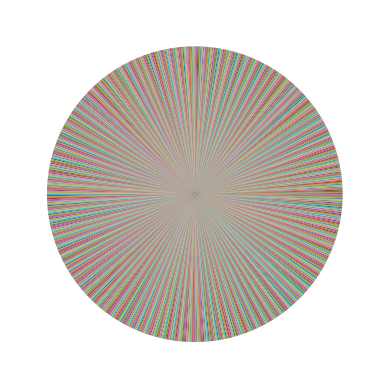

In [18]:
x = df.thal
plt.pie(x)

<StemContainer object of 3 artists>

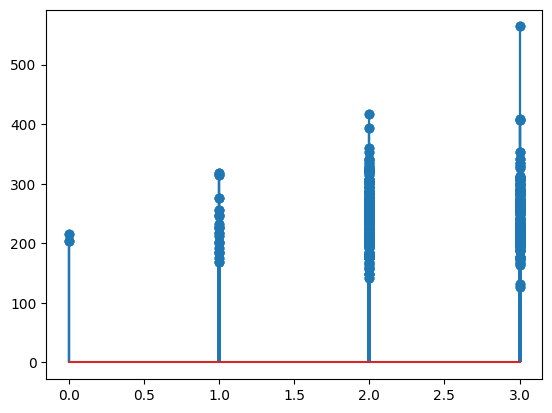

In [19]:
x =df.thal
y = df.chol
plt.stem(x,y)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7fc78b7760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7fc78b7ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7fc78b74c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7fc78c5220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7fc78f5820>],
 'means': []}

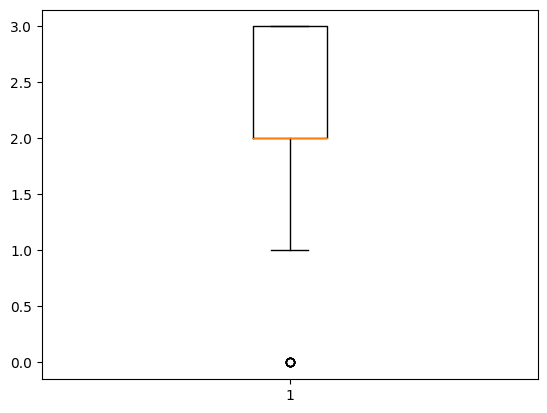

In [20]:

y = df.thal
plt.boxplot(y)

In [21]:
 x = df.drop('target', axis = 1)
 y = df['target']

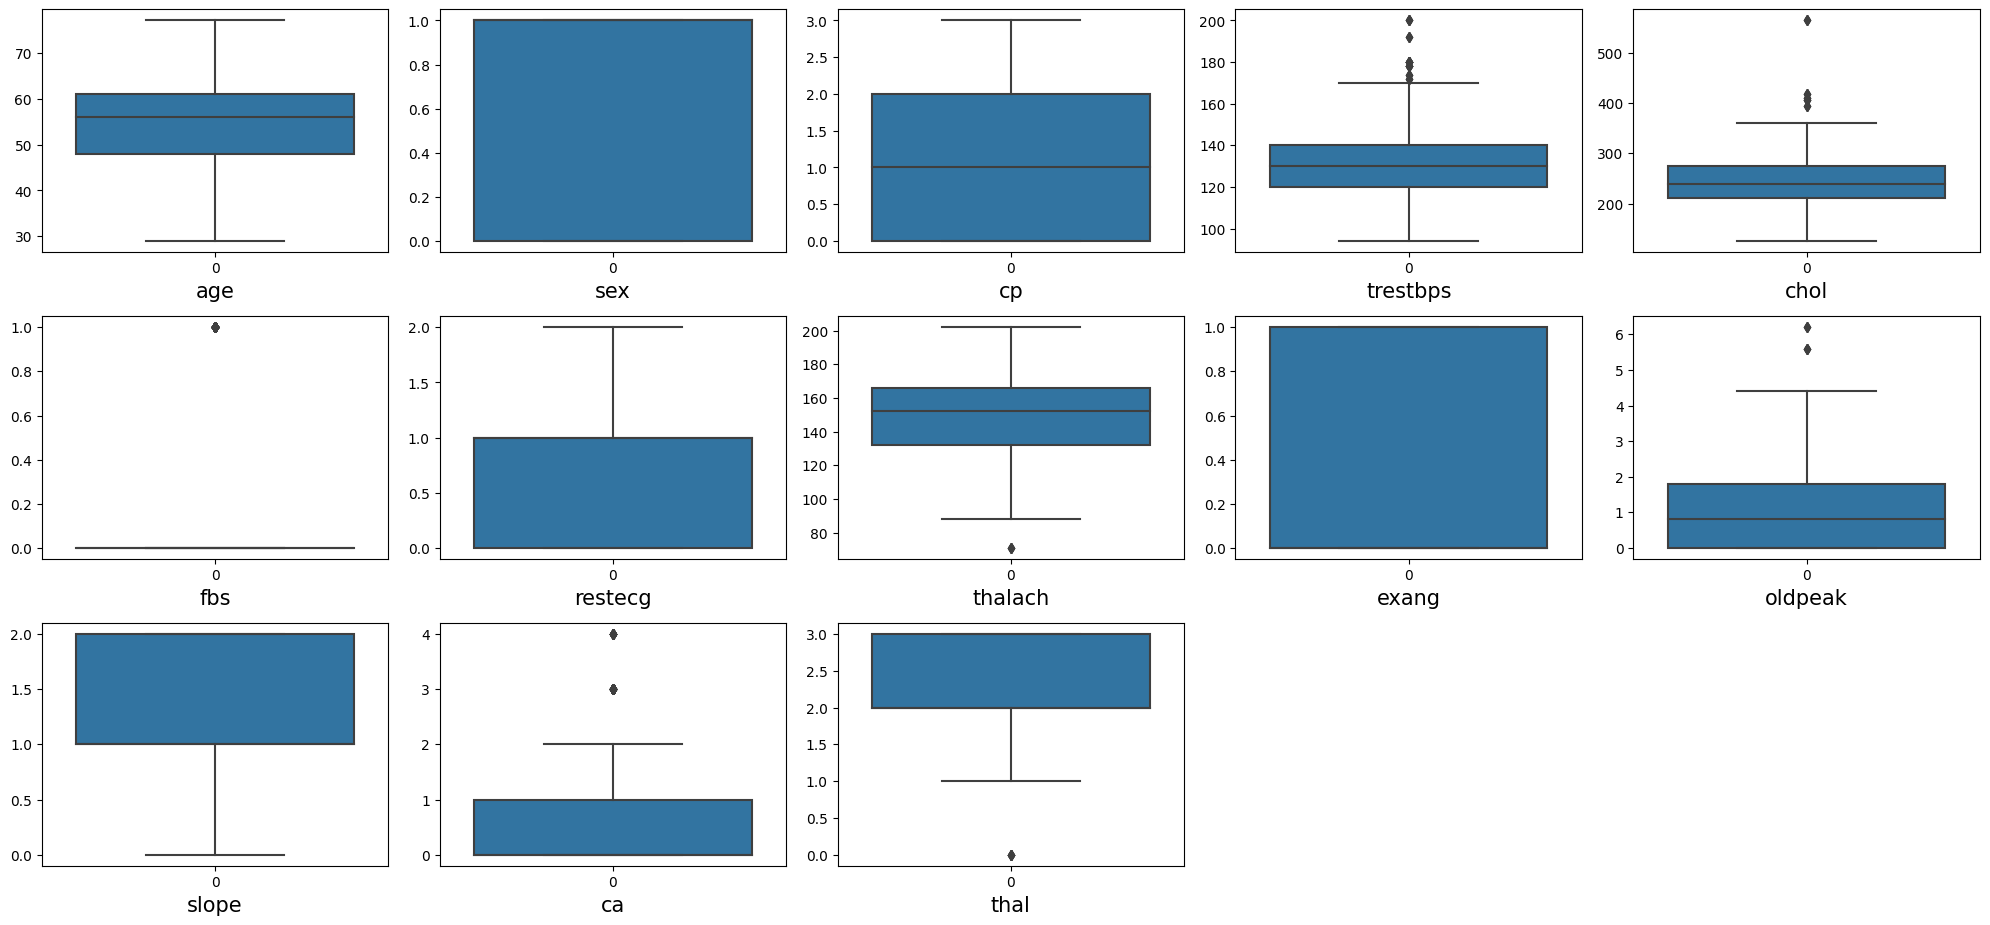

In [22]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in x.columns:
  if plotnumber <= 24:
    ax =  plt.subplot(5,5,plotnumber)
    sns.boxplot(x[col])
    plt.xlabel(col, fontsize = 15)
  plotnumber += 1
plt.tight_layout()
plt.show()

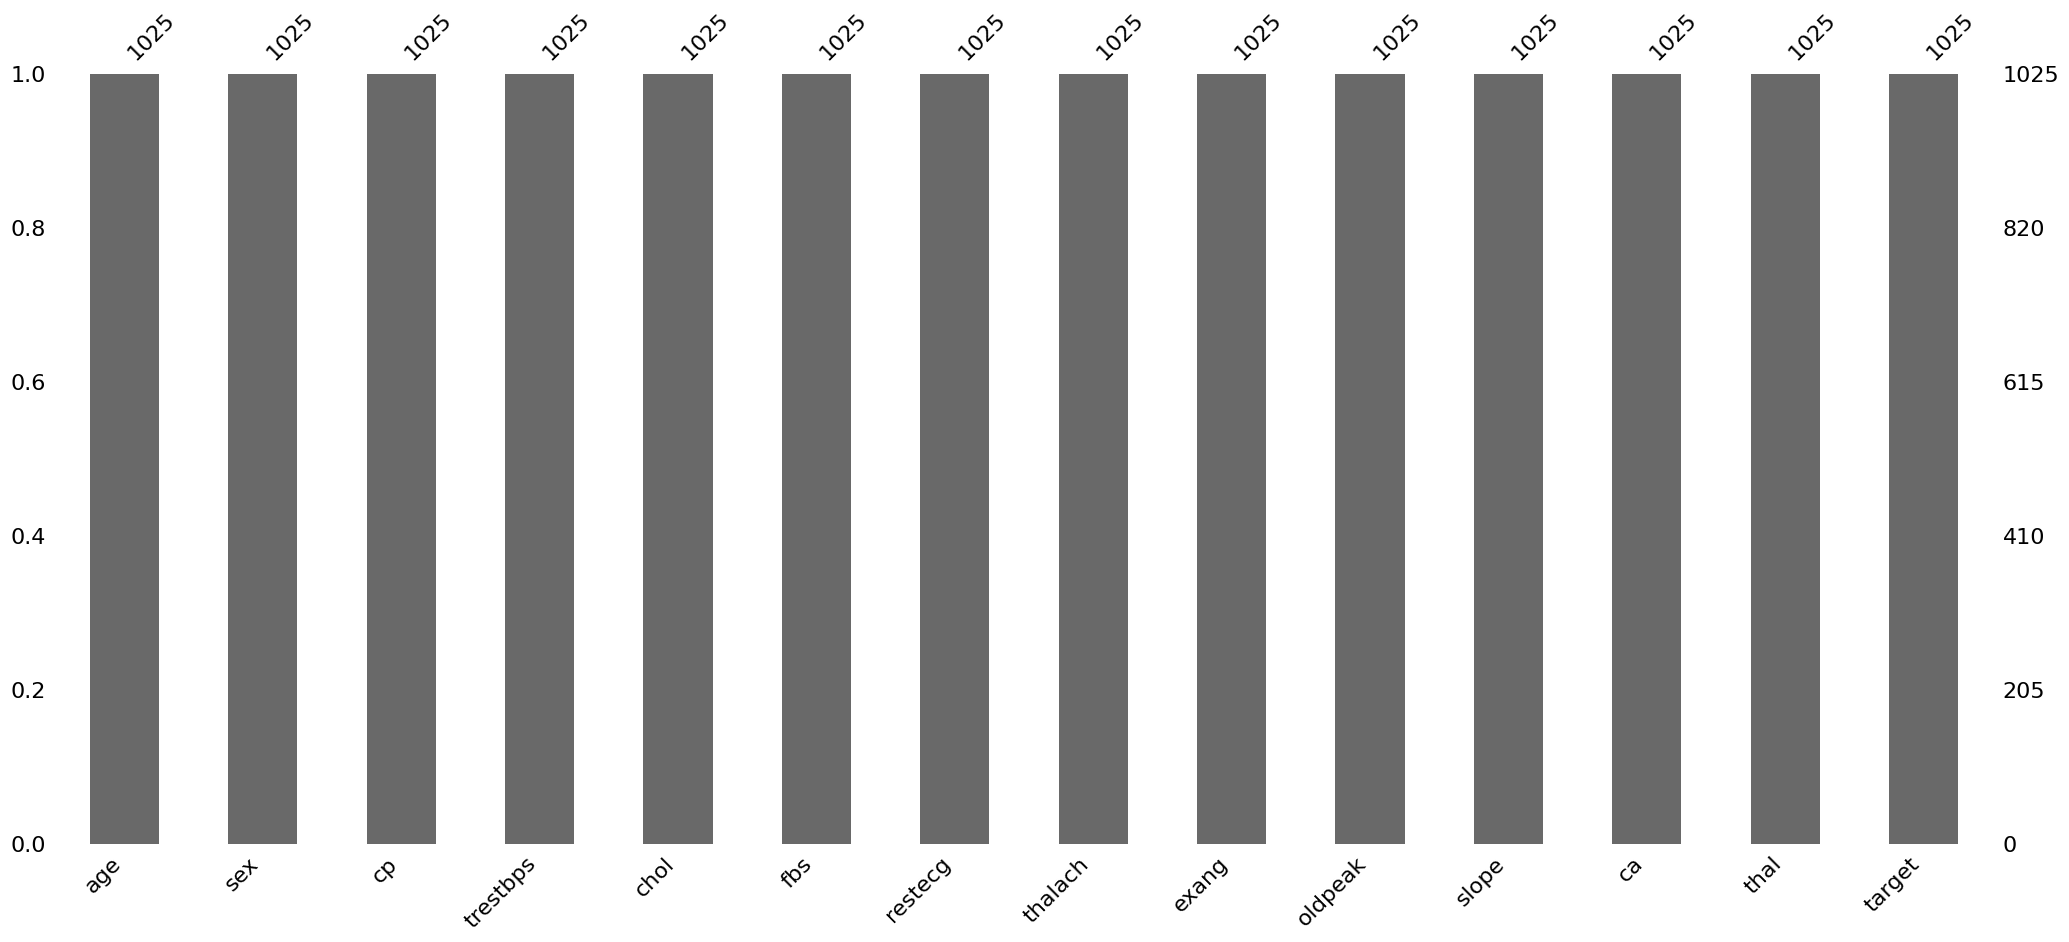

In [23]:
import missingno as msno
msno.bar(df)
plt.show()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state=0)

In [25]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [26]:
clf = DecisionTreeClassifier(criterion = "entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
y_pred = clf.predict(x_test)

In [28]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[241,   0],
       [ 18, 254]])

In [29]:
from sklearn.metrics import accuracy_score

In [30]:

accuracy_score(y_test, y_pred)

0.9649122807017544

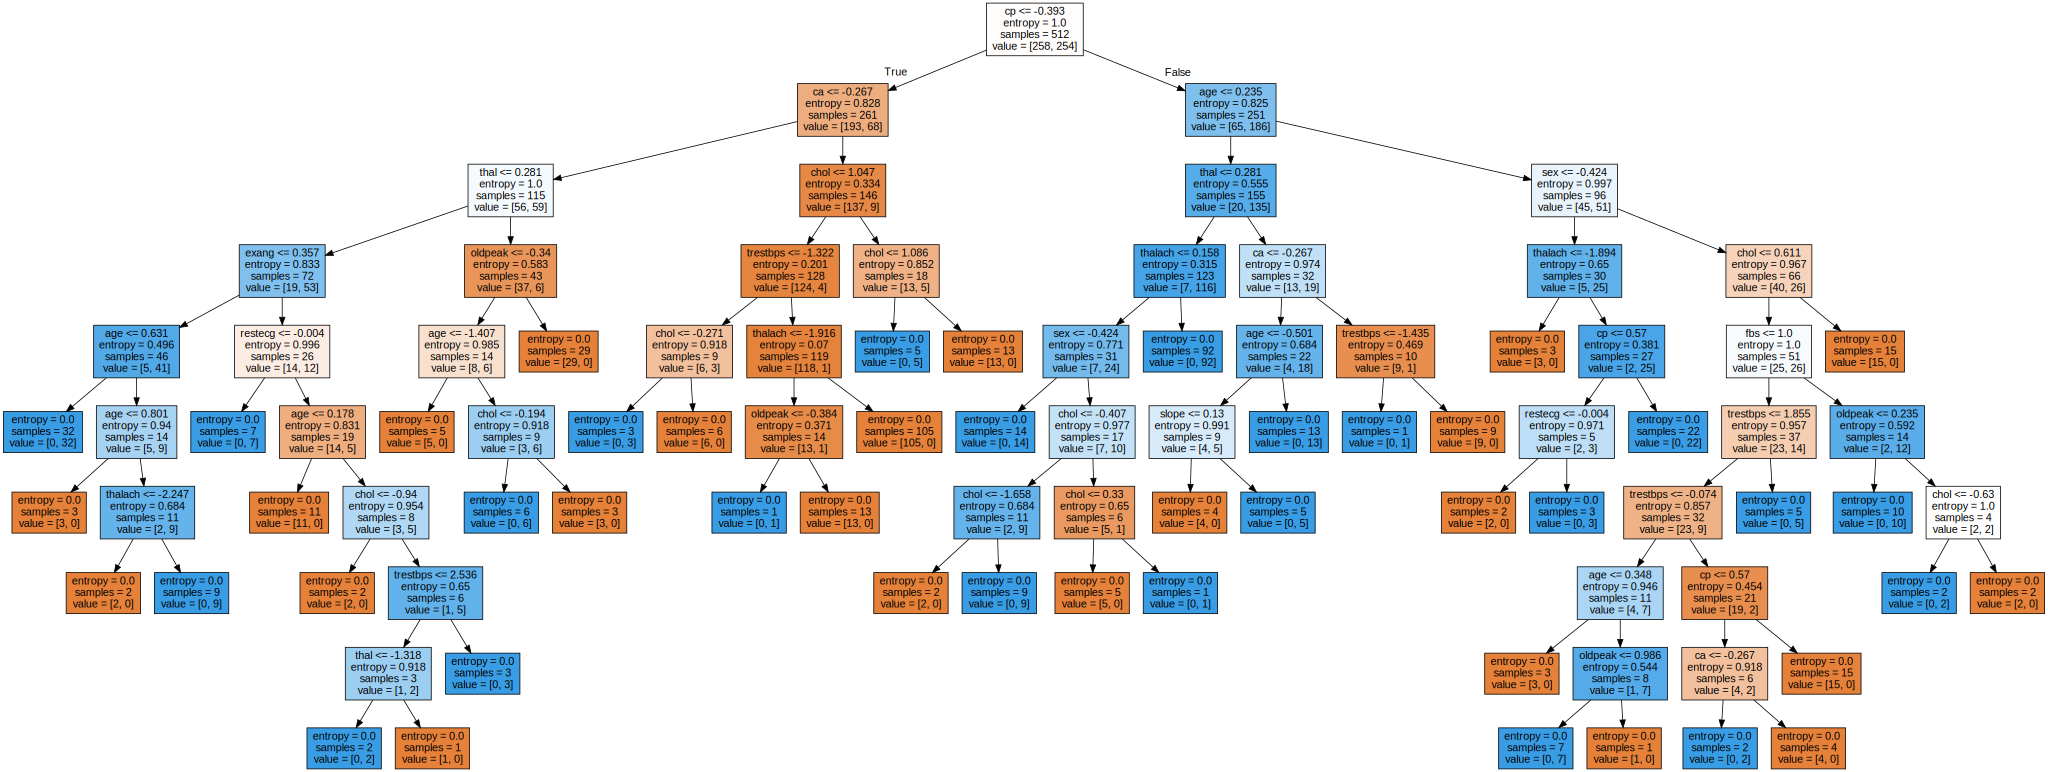

In [31]:
graphviz.Source(export_graphviz(clf,feature_names = x.columns,filled=True))